# XgBoost Regression

**Importing the necessary library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


## Exploratory Data Analysis ie EDA

In [3]:
print("Shape : {}\nDataTypes : {}".format(df.shape , df.dtypes.value_counts()))

Shape : (1093, 9)
DataTypes : float64    9
dtype: int64


In [4]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


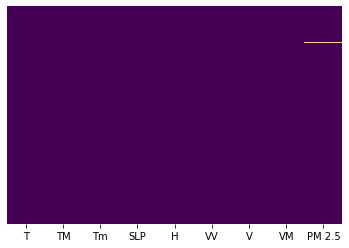

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**We can see some missing values in Pm 2.5 lets get the exact count**

In [6]:
df.isnull().sum().sort_values(ascending=False).head(3)

PM 2.5    1
VM        0
V         0
dtype: int64

**We can probably drop the 2 rows as it is**

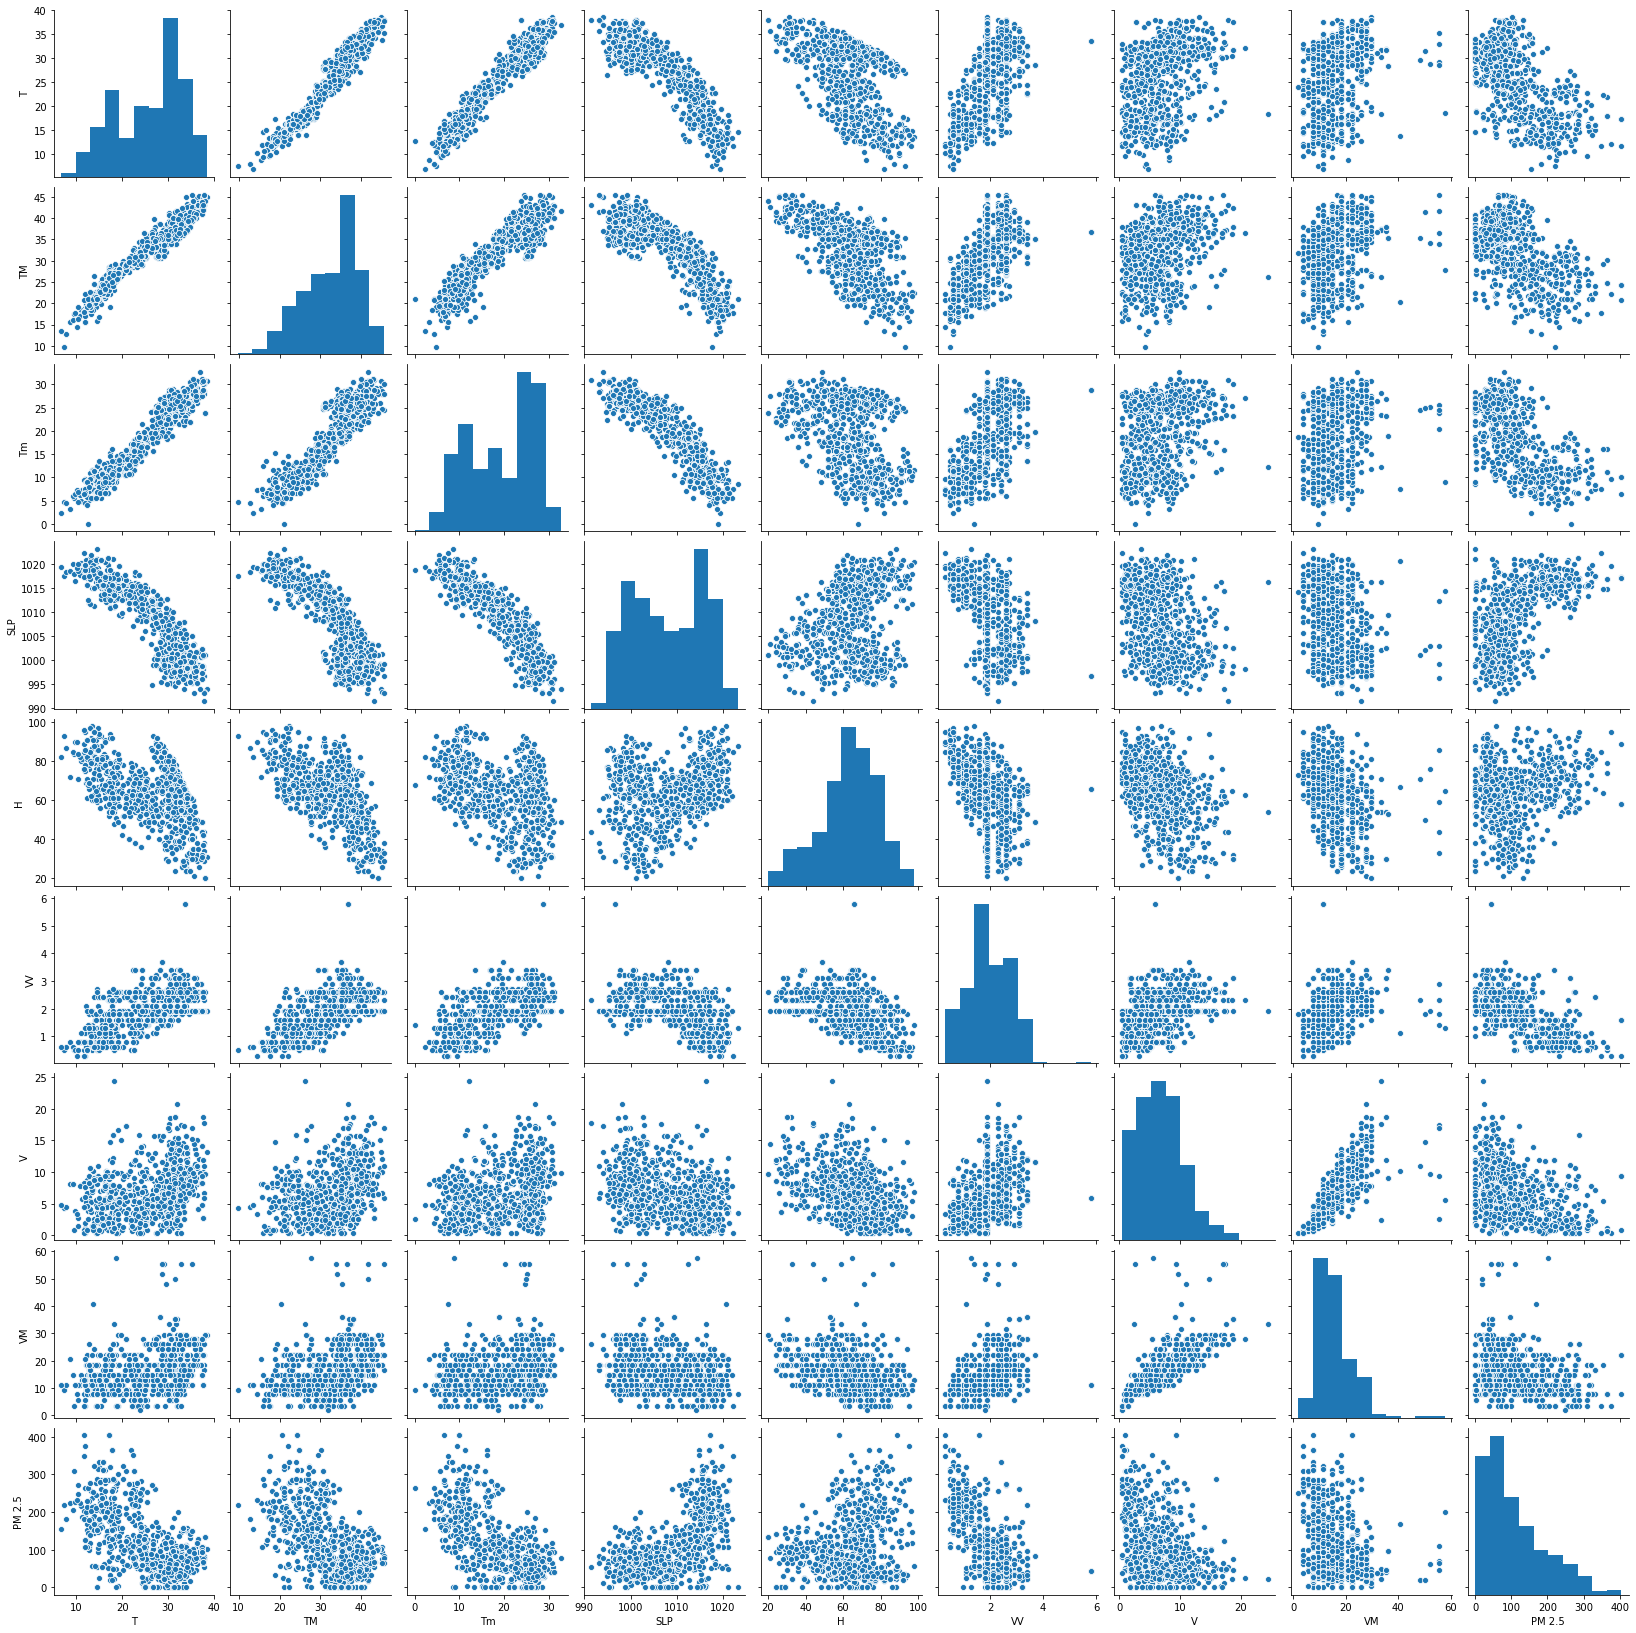

In [7]:
sns.pairplot(df)

**we can see some correaltion between some independent features we will cover this in feature engg and feature selection section**

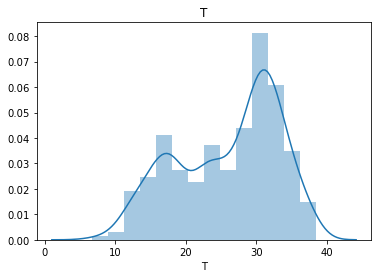

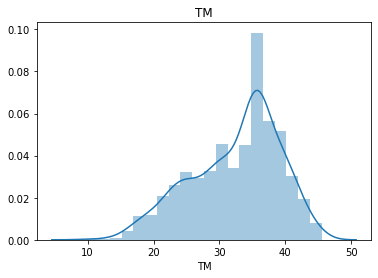

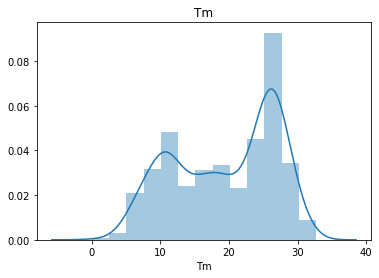

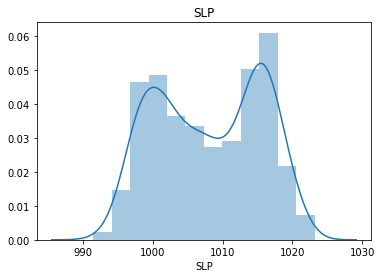

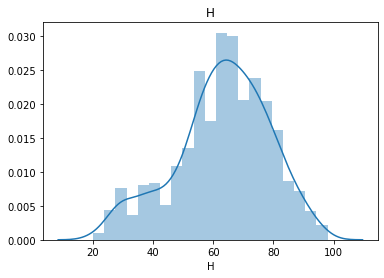

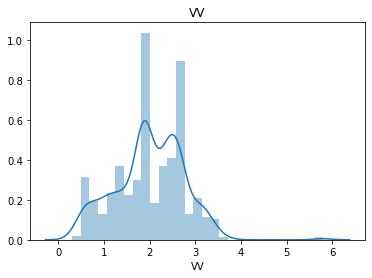

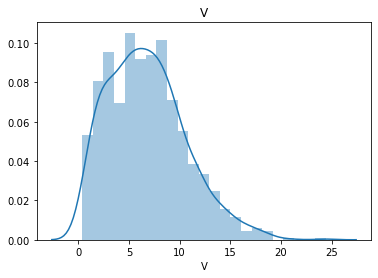

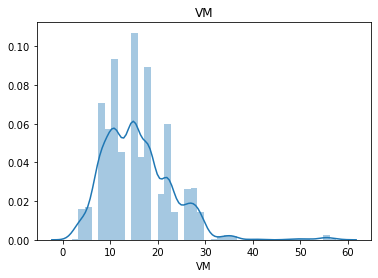

In [8]:
#lets fet the distribution of all independent variables
for col  in df.columns:
    if col != 'PM 2.5':
        sns.distplot(df[col])
        plt.title(col)
        plt.show()


##### We can see most of the indepemdent features follow a normal distribution

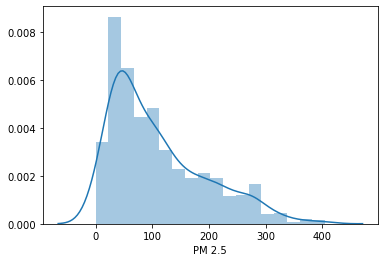

In [9]:
sns.distplot(df['PM 2.5'])

**The dependent feature is rightly skewed some what ie mean > median**

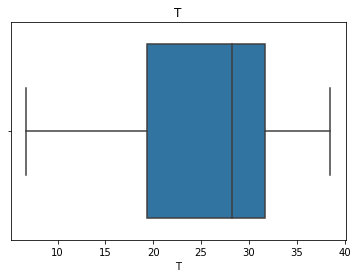

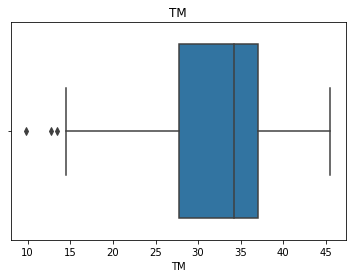

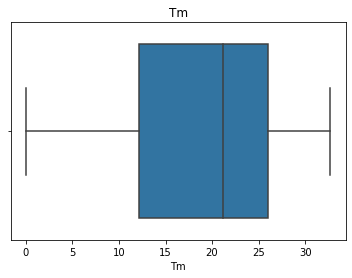

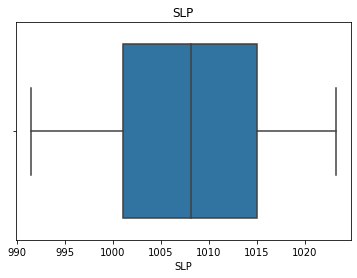

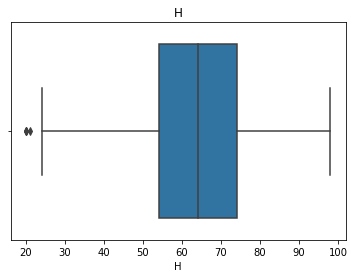

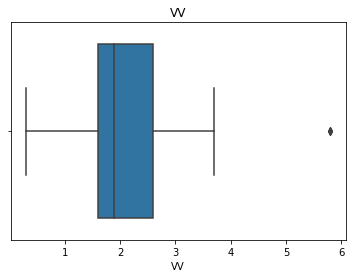

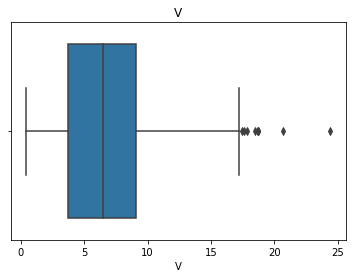

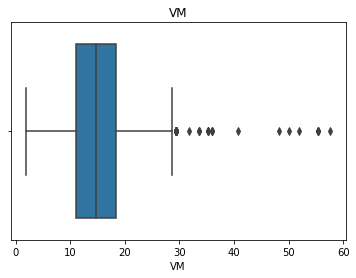

In [10]:
#lets fet the distribution of all independent variables
for col  in df.columns:
    if col != 'PM 2.5':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()


#### we can see some ouliers here

# Feature Selection & Feature Engg.

In [11]:
df.dropna(inplace=True)

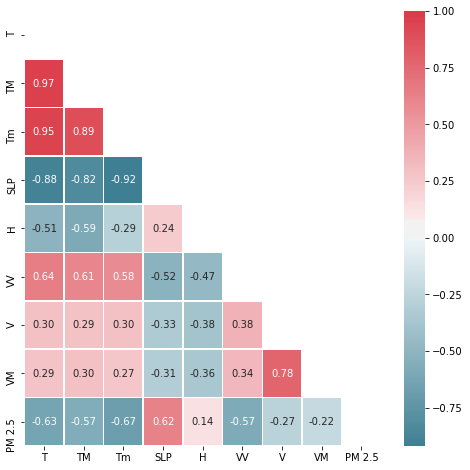

In [12]:
# Corelation Matrix with heat-map
corr = df.corr()
fig, ax= plt.subplots(figsize=(8,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

**We can get the insight with the help of correlation matrix that T,TM,Tm, and W are negatively corealted and SLP is positively corealted as H, V, VM not seem much to affect the dependent feature**

In [13]:
corr.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [14]:
#lets get the independent and dependent feature seprated
X = df.drop(columns=['PM 2.5'])
y = df['PM 2.5']
print("X : {}\ny : {}".format(X.shape,y.shape))

X : (1092, 8)
y : (1092,)


In [15]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
print(model.feature_importances_)

[0.23827862 0.04788835 0.31084012 0.05328201 0.09378398 0.16714968
 0.04976333 0.03901391]


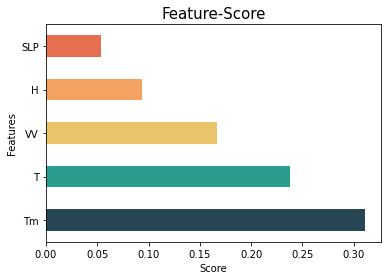

In [17]:
#lets plot a graph of feature importance
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind='barh', color=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.ylabel('Features')
plt.xlabel('Score')
plt.title('Feature-Score',size=15)
plt.show()

**we will not skip any feature as the dataset is relatively small but for a big dataset this this might be useful**

# Model Building

In [18]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.3, random_state=0)
print("X_train:{}   y_train:{}\nX_test:{}   y_test:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

X_train:(764, 8)   y_train:(764,)
X_test:(328, 8)   y_test:(328,)


In [19]:
import xgboost as xgb

In [20]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train,y_train)

[23:04:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8606305938167513
Coefficient of determination R^2 <-- on train set: 0.7210652962292528


In [22]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(regressor,X,y,cv=5)

[23:04:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
cv.mean() #ie score

0.6582827367763413

**Model Evaluation**

In [24]:
y_pred = regressor.predict(X_test)

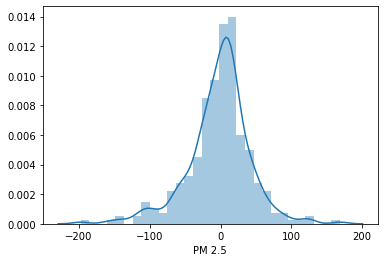

In [25]:
sns.distplot(y_pred-y_test)

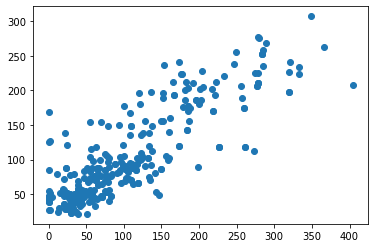

In [26]:
plt.scatter(y_test,y_pred)

# Hyperparameter Tuning

In [27]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]



In [30]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [31]:
#use the RandomSearch for best parameters 1st create base model to tune
regressor = xgb.XGBRegressor()

In [32]:
xg_random = RandomizedSearchCV(estimator=regressor , param_distributions=random_grid , scoring='neg_mean_squared_error',
                              n_iter=100 , cv=5 , verbose=2 , random_state=42 , n_jobs=-1) 
                                

In [33]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.9min finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[23:06:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error'

In [34]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [35]:
xg_random.best_score_

-1380.1355516147596

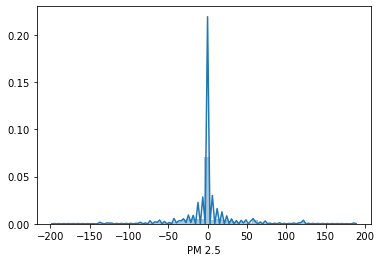

In [36]:
prediction = xg_random.predict(X_test)
sns.distplot(y_test-prediction)

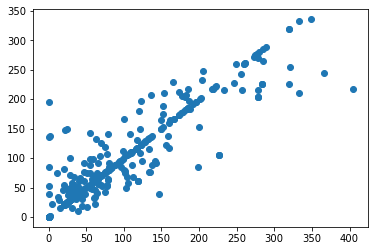

In [37]:
plt.scatter(y_test,prediction)

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 31.730371286423228
MSE: 1998.2328184391486
RMSE: 44.701597493145016


In [39]:
xg_random

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error'

In [50]:
# save the model to disk
import pickle
filename = 'weights/xg_boost_regression_model.sav'
pickle.dump(xg_random, open(filename, 'wb'))


In [51]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

[23:09:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-1355.708107839994


In [112]:
cols = X_train.columns

In [115]:
cols

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

In [111]:
b = [33.1, 39.0 ,24.0 ,1003.0 ,26.0 ,2.6 ,10.4 ,24.1]
b = pd.DataFrame(b)
b = b.transpose()
for i in range(0,8):
    b = b.rename(columns={i : X_train.columns[i]})
print(loaded_model.predict(b))
#print(loaded_model.predict([[11.1, 22.0 ,33.0 ,44.0 ,55.0 ,66.0 ,77.0 ,88.0]]))

[104.62521]


# All

In [ ]:
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# #from catboost import CatBoostRegressor
# from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
# from sklearn.metrics import mean_squared_error

# models = [['DecisionTree :',DecisionTreeRegressor()],
#            ['Linear Regression :', LinearRegression()],
#            ['RandomForest :',RandomForestRegressor()],
#            ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
#            ['SVM :', SVR()],
#            ['AdaBoostClassifier :', AdaBoostRegressor()],
#            ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
#            ['Xgboost: ', XGBRegressor()],
#            #['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
#            ['Lasso: ', Lasso()],
#            ['Ridge: ', Ridge()],
#            ['BayesianRidge: ', BayesianRidge()],
#            ['ElasticNet: ', ElasticNet()],
#            ['HuberRegressor: ', HuberRegressor()]]

# print("Results...")


# for name,model in models:
#     model = model
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
#     print(model.score(X_test,y_test))
#     sns.distplot(y_test-predictions)
#     plt.title(name)
#     plt.show()